<a href="https://colab.research.google.com/github/gabriquaranta/drones-stuff/blob/main/yolo5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!kaggle datasets download dasmehdixtr/drone-dataset-uav

!mkdir ./datasets
!mkdir ./datasets/train
!mkdir ./datasets/val
!mkdir ./datasets/test

!unzip -q drone-dataset-uav.zip
!rm -rf ./dataset_xml_format/
!rm -rf ./drone-dataset-uav.zip


Dataset URL: https://www.kaggle.com/datasets/dasmehdixtr/drone-dataset-uav
License(s): copyright-authors
 99% 711M/716M [00:06<00:00, 153MB/s]
100% 716M/716M [00:06<00:00, 116MB/s]


In [2]:
import shutil
import os
import random

!rm -rf ./datasets/

source_dir = "./drone_dataset_yolo/dataset_txt"
train_dir = "./datasets/train"
val_dir = "./datasets/val"
test_dir = "./datasets/test"

#count txt files in drone_dataset_yoy/dataset_txt
filenames = [f[:-4] for f in os.listdir(source_dir) if f.endswith('.txt')]
n_pics=len(filenames)
print(n_pics)

ids=[i for i in range(n_pics)]
random.shuffle(ids)
#print(ids)

trainratio=0.8
valratio=0.1
testratio=0.1

train_ids=ids[:int(n_pics*trainratio)]
val_ids=ids[int(n_pics*trainratio):int(n_pics*(trainratio+valratio))]
test_ids=ids[int(n_pics*(trainratio+valratio)):]

print(len(train_ids), len(val_ids), len(test_ids))

# check destination directories exist
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

def copy_files(file_ids, destination):
    missing_files = []
    for i in file_ids:
        txt_src = os.path.join(source_dir, f"{filenames[i]}.txt")
        img_src = os.path.join(source_dir, f"{filenames[i]}.jpg")

        txt_dest = os.path.join(destination, f"{filenames[i]}.txt")
        img_dest = os.path.join(destination, f"{filenames[i]}.jpg")

        # copy only if source file exists
        if os.path.exists(txt_src):
            shutil.copy(txt_src, txt_dest)
        else:
            missing_files.append(txt_src)

        if os.path.exists(img_src):
            shutil.copy(img_src, img_dest)
        else:
            missing_files.append(img_src)

    if missing_files:
        print("Missing files:", missing_files)

# Process train, val, and test sets
copy_files(train_ids, train_dir)
copy_files(val_ids, val_dir)
copy_files(test_ids, test_dir)


#above code makes folder structure for yolo 11, yolo 5 needs images and label folders

os.makedirs(os.path.join('./datasets', 'images'), exist_ok=True)
shutil.move('./datasets/train', './datasets/images')
shutil.move('./datasets/val', './datasets/images')
shutil.move('./datasets/test', './datasets/images')

os.makedirs(os.path.join('./datasets', 'labels'), exist_ok=True)
os.makedirs(os.path.join('./datasets', 'labels', 'train'), exist_ok=True)
os.makedirs(os.path.join('./datasets', 'labels', 'val'), exist_ok=True)
os.makedirs(os.path.join('./datasets', 'labels', 'test'), exist_ok=True)

for file in os.listdir('./datasets/images/train'):
    if file.endswith('.txt'):
        shutil.move(os.path.join('./datasets/images/train', file), os.path.join('./datasets/labels/train', file))

for file in os.listdir('./datasets/images/val'):
    if file.endswith('.txt'):
        shutil.move(os.path.join('./datasets/images/val', file), os.path.join('./datasets/labels/val', file))

for file in os.listdir('./datasets/images/test'):
    if file.endswith('.txt'):
        shutil.move(os.path.join('./datasets/images/test', file), os.path.join('./datasets/labels/test', file))


1360
1088 136 136
Missing files: ['./drone_dataset_yolo/dataset_txt/classes.jpg']


In [11]:
import yaml

# Define the data dictionary
data = {
    'path': '/content/',
    'train': './datasets/images/train',
    'val': './datasets/images/val',
    'test': './datasets/images/test',
    'nc': 1,  # Number of classes
    'names': ['drone']  # Class names
}

yaml_file_path = 'drone_data.yaml'

with open(yaml_file_path, 'w') as yaml_file:
    yaml.dump(data, yaml_file, default_flow_style=False)


In [4]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
!pip install -r requirements.txt  # install

Cloning into 'yolov5'...
remote: Enumerating objects: 17270, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 17270 (delta 0), reused 0 (delta 0), pack-reused 17265 (from 1)
Receiving objects: 100% (17270/17270), 16.11 MiB | 15.59 MiB/s, done.
Resolving deltas: 100% (11861/11861), done.
/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 97.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 78.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 59.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00

In [6]:
%cd ..

/content


In [13]:
!python './yolov5/train.py' --img 640 --epochs 10 --data drone_data.yaml --weights yolov5s.pt

wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2025-02-02 10:41:34.281270: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1738492894.315384    5244 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1738492894.325803    5244 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice: (30 second timeout) 3
wandb: You chose "Don't visualize my results"
train: weights=yolov5s.pt, cfg=, data=drone_data.yaml, hyp=yolov5/data/hy

exp5


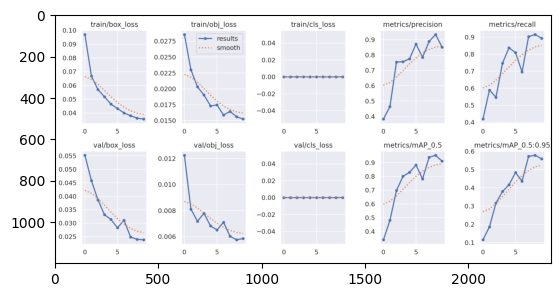

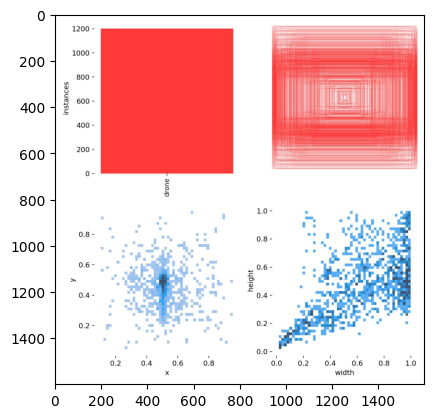

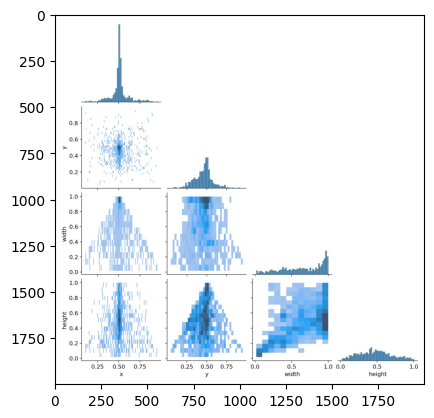

In [22]:
from PIL import Image
import matplotlib.pyplot as plt


latest_run_dir=os.listdir('./yolov5/runs/train')
latest_run_dir.sort()
latest_run_dir=latest_run_dir[-1]
print(latest_run_dir)

results=Image.open('./yolov5/runs/train/'+latest_run_dir+'/results.png')
plt.figure()
plt.imshow(results)
plt.show()


labels=Image.open('./yolov5/runs/train/'+latest_run_dir+'/labels.jpg')
plt.figure()
plt.imshow(labels)
plt.show()

labels_corr=Image.open('./yolov5/runs/train/'+latest_run_dir+'/labels_correlogram.jpg')
plt.figure()
plt.imshow(labels_corr)
plt.show()


In [34]:
# test
!python ./yolov5/detect.py --source ./datasets/images/test/ --weights ./yolov5/runs/train/{latest_run_dir}/weights/best.pt  --conf 0.25

detect: weights=['./yolov5/runs/train/exp5/weights/best.pt'], source=./datasets/images/test/, data=yolov5/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-398-g5cdad892 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/136 /content/datasets/images/test/0016.jpg: 480x640 1 drone, 28.8ms
image 2/136 /content/datasets/images/test/0029.jpg: 448x640 1 drone, 29.4ms
image 3/136 /content/datasets/images/test/0032.jpg: 384x640 1 drone, 27.8ms
image 4/136 /content/datasets/images/test/0033.jpg: 384x64

exp8


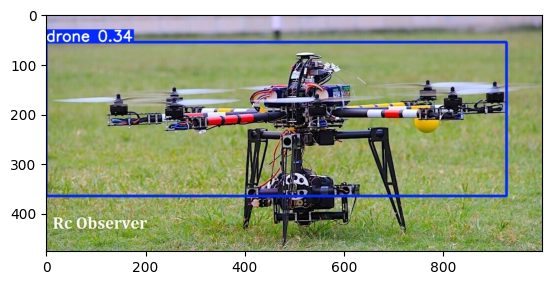

In [39]:
latest_detection_dir=os.listdir('./yolov5/runs/detect')
latest_detection_dir.sort()
latest_detection_dir=latest_detection_dir[-1]
print(latest_detection_dir)


random_detection_image=random.choice(os.listdir('./yolov5/runs/detect/'+latest_detection_dir))
random_detection_image=Image.open('./yolov5/runs/detect/'+latest_detection_dir+'/'+random_detection_image)
plt.figure()
plt.imshow(random_detection_image)